# Setup

In [4]:
import pandas as pd 
import scipy.stats as stats

# We also want to plot graphs and histograms
# using matplotlib
import matplotlib.pyplot as plt

In [5]:
dataConditionA = pd.read_csv('conditionA.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times Wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataConditionA["condition"] = "Arrow"

In [41]:
dataConditionB = pd.read_csv('conditionB.csv', header=0, names = ['participant number', 'time going forward', 'time going back', 'mistakes made', 'shortcuts taken', 'times Wandered away from navigational aid', 'time spent away from navigational aid', 'finished'])  #Reading data where the arrow was the navigational aid
dataConditionB["condition"] = "NPC"

dataConditionB = dataConditionB.loc[dataConditionB["participant number"] != "B12"]

In [42]:
timeWanderedPercentage = 0.1
def getDataNoWander(conditionData):
    finishedCondition = conditionData.loc[conditionData["time spent away from navigational aid"] >= 0]

    dataNoWander = pd.DataFrame(data={}, columns=finishedCondition.columns)
    iterator = 0
    for timeGoingForward in finishedCondition["time going forward"].values:
        timeWandering = finishedCondition["time spent away from navigational aid"].values[iterator]
        if timeWandering / timeGoingForward < timeWanderedPercentage:
            dataNoWander.loc[iterator] = finishedCondition.iloc[iterator]
        iterator+=1
    return dataNoWander

In [43]:
dataNoWanderA = getDataNoWander(dataConditionA)
dataNoWanderB = getDataNoWander(dataConditionB)

In [44]:
dataNoWanderA

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times Wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,A00,337.88000,274.20000,2,1,0,0.000000,Yes,Arrow
1,A01,356.92004,612.51996,5,4,1,0.760010,Yes,Arrow
2,A02,427.00000,393.68000,5,3,5,29.599990,Yes,Arrow
4,A04,345.00000,416.32000,8,1,1,5.880005,Yes,Arrow
5,A06,405.36000,981.28000,9,4,3,18.559998,Yes,Arrow
6,A08,357.88000,384.44003,5,3,0,0.000000,Yes,Arrow
7,A11,447.92000,338.36000,3,3,1,1.240021,Yes,Arrow
9,A13,357.84000,385.16000,5,3,0,0.000000,Yes,Arrow
10,A15,308.04000,498.96000,8,4,1,0.600006,Yes,Arrow
12,A20,412.84000,563.07996,6,4,2,15.359955,Yes,Arrow


In [45]:
dataNoWanderB

,participant number,time going forward,time going back,mistakes made,shortcuts taken,times Wandered away from navigational aid,time spent away from navigational aid,finished,condition
0,B00,352.03998,257.64008,3,4,1,15.720001,Yes,NPC
2,B03,353.68000,349.56000,6,2,1,0.040009,Yes,NPC
3,B04,336.40000,277.56003,1,1,3,4.839996,Yes,NPC
7,B09,316.08002,410.07996,5,3,0,0.000000,Yes,NPC
9,B13,316.40000,492.32004,7,2,0,0.000000,Yes,NPC
10,B14-1,363.24000,342.12000,5,1,4,8.240021,Yes,NPC
11,B16,330.88000,352.52002,4,4,0,0.000000,Yes,NPC
13,B20,296.91998,449.36002,4,4,0,0.000000,Yes,NPC
15,B22,419.16000,336.68002,6,1,11,28.160007,Yes,NPC
16,B23,296.24000,883.40010,8,4,0,0.000000,Yes,NPC


In [46]:
dataNoWanderA.index.size

23

In [47]:
dataNoWanderB.index.size

20

## T-test

#### Precautions before doing t-test

In [48]:
arrowTime = dataNoWanderA.loc[dataNoWanderA["condition"] == "Arrow", 'time going back']
stats.shapiro(arrowTime)

(0.8839740753173828, 0.01198967732489109)

In [49]:
npcTime = dataNoWanderB.loc[dataNoWanderB["condition"] == "NPC", 'time going back']
stats.shapiro(npcTime)

(0.7176910042762756, 6.457891140598804e-05)

In [50]:
import numpy
arrowTime = dataNoWanderA.loc[dataNoWanderA["condition"] == "Arrow", 'time going back']
arrowTime = numpy.log(arrowTime)
stats.shapiro(arrowTime)

(0.9773516058921814, 0.856484591960907)

In [51]:
npcTime = dataNoWanderB.loc[dataNoWanderB["condition"] == "NPC", 'time going back']
npcTime = numpy.log(npcTime)
stats.shapiro(npcTime)

(0.8781998753547668, 0.016424091532826424)

In [52]:
arrowMistakes = dataNoWanderA.loc[dataNoWanderA["condition"] == "Arrow", 'mistakes made']
stats.shapiro(arrowMistakes)

(0.9249818921089172, 0.08523423224687576)

In [53]:
npcMistakes = dataNoWanderB.loc[dataNoWanderB["condition"] == "NPC", 'mistakes made']
stats.shapiro(npcMistakes)

(0.9533135890960693, 0.42019975185394287)

In [54]:
stats.levene(arrowTime, npcTime)

LeveneResult(statistic=1.9627587724583062, pvalue=0.1687424436329103)

In [20]:
stats.levene(arrowMistakes, npcMistakes)

LeveneResult(statistic=0.05914577893975712, pvalue=0.8090638823046135)

In [58]:
arrowMistakes = numpy.log(arrowMistakes)
npcMistakes = numpy.log(npcMistakes)
stats.levene(arrowMistakes, npcMistakes)

AttributeError: 'int' object has no attribute 'log'

(array([ 0.,  4., 11.,  5.,  2.,  0.,  1.,  0.,  0.,  0.]),
 array([   0.,  150.,  300.,  450.,  600.,  750.,  900., 1050., 1200.,
        1350., 1500.]),
 <a list of 10 Patch objects>)

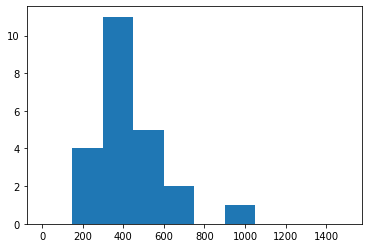

In [21]:
plt.hist(dataNoWanderA['time going back'], bins = 10, range = (0,1500))

(array([ 0.,  3., 13.,  3.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([   0.,  150.,  300.,  450.,  600.,  750.,  900., 1050., 1200.,
        1350., 1500.]),
 <a list of 10 Patch objects>)

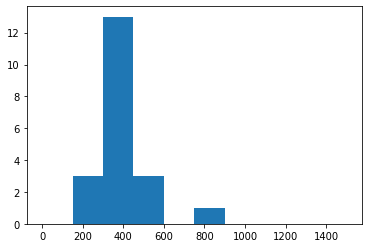

In [22]:
plt.hist(dataNoWanderB['time going back'], bins = 10, range = (0,1500))

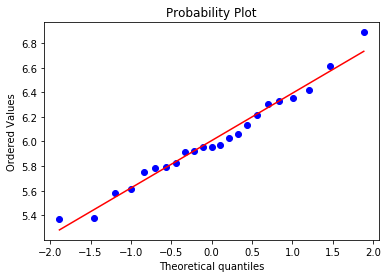

In [23]:
stats.probplot(arrowTime, plot = plt)
plt.show()

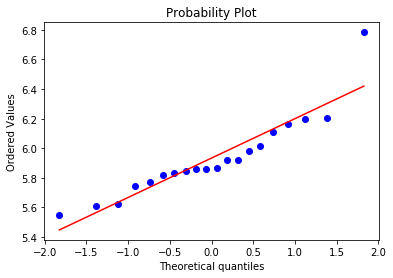

In [24]:
stats.probplot(npcTime, plot = plt)
plt.show()

#### Comparing times to go back

In [25]:
stats.ttest_ind(arrowTime, npcTime)

Ttest_indResult(statistic=0.7247126659799856, pvalue=0.4727441181504104)

#### Comparing mistakes made

In [26]:
stats.ttest_ind(arrowMistakes, npcMistakes)

Ttest_indResult(statistic=0.6677668158522836, pvalue=0.5080241054471146)

In [55]:
stats.mannwhitneyu(arrowTime, npcTime)

MannwhitneyuResult(statistic=194.0, pvalue=0.19368466273455737)

In [56]:
stats.mannwhitneyu(arrowMistakes, npcMistakes)

MannwhitneyuResult(statistic=219.0, pvalue=0.3967428033497346)